In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# 2.1 Preparing the datasets

In [96]:
# 1. Load data
data = pd.read_csv('winequality-white.csv',sep = ';')

In [97]:
# Kiểm tra các dòng đầu tiên trong dữ liệu
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [98]:
X = data.drop('quality', axis=1)
y = data['quality']

# Group wine quality into 3 categories: Low, Standard, and High
def categorize_quality(quality):
    if quality <= 4:
        return 'Low'
    elif quality <= 6:
        return 'Standard'
    else:
        return 'High'

y = y.apply(categorize_quality)

In [99]:
# Define splits
proportions = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
splits = []

for train_size, test_size in proportions:
    feature_train, feature_test, label_train, label_test = train_test_split(
        X, y, train_size=train_size, test_size=test_size, stratify=y, random_state=42)
    splits.append((feature_train, feature_test, label_train, label_test))

# Định nghĩa độ sâu tối đa của cây
max_depth_value = None


## Visualize distributions

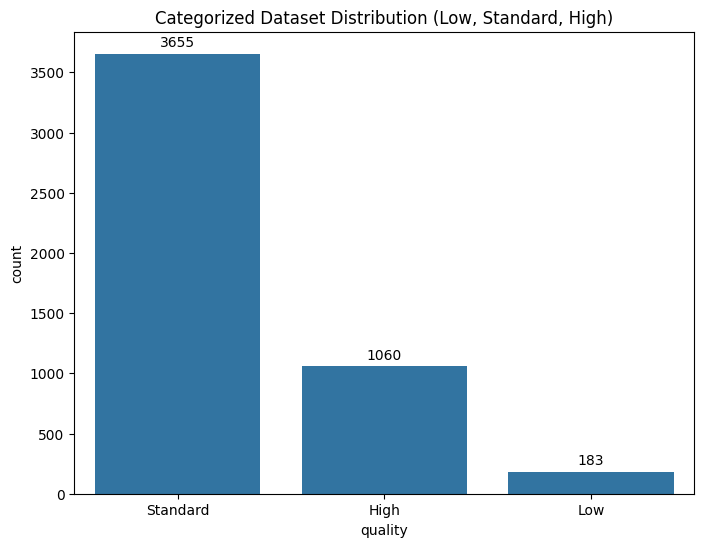

In [100]:
# Original dataset distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y)
plt.title("Categorized Dataset Distribution (Low, Standard, High)")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()


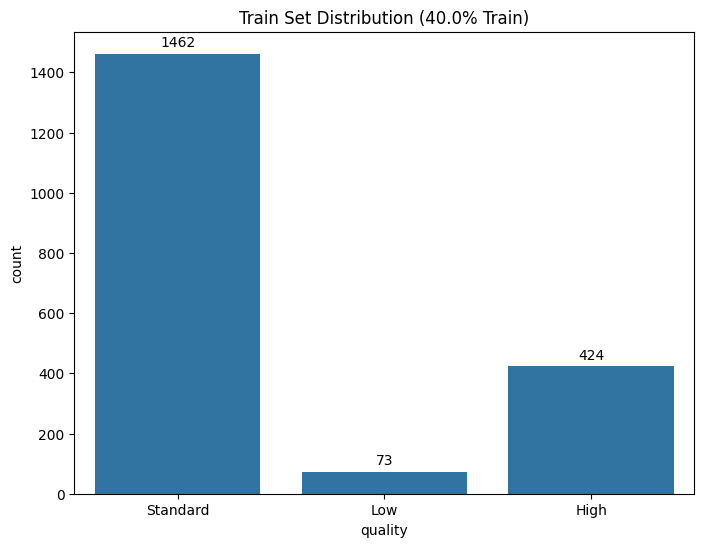

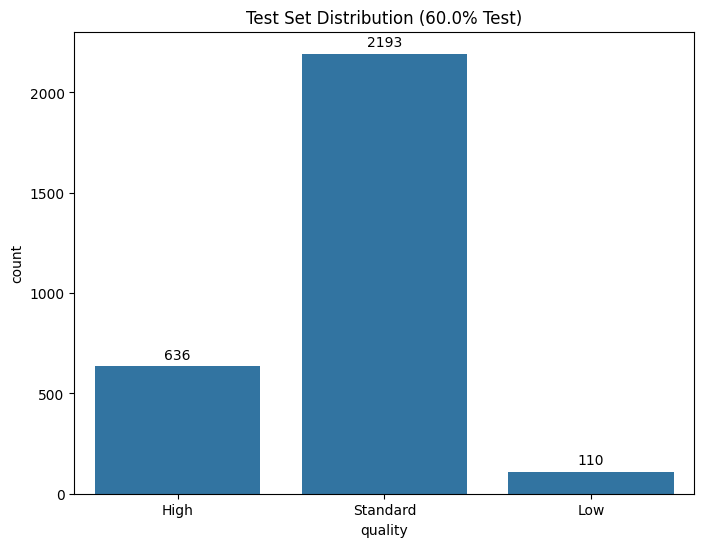

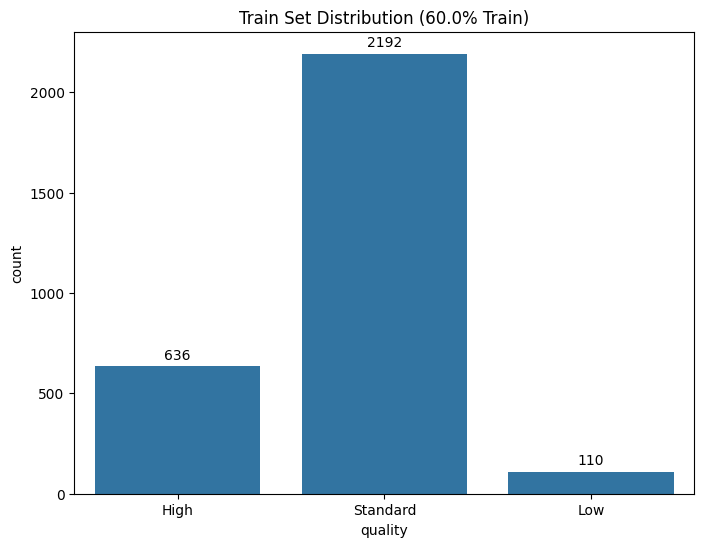

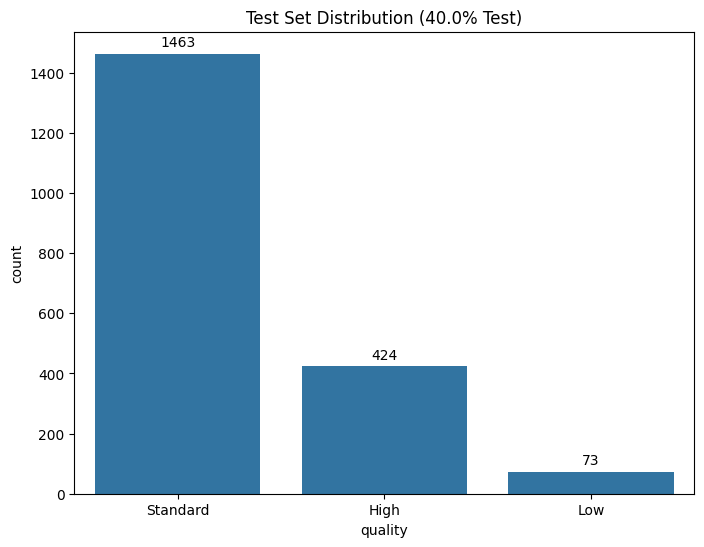

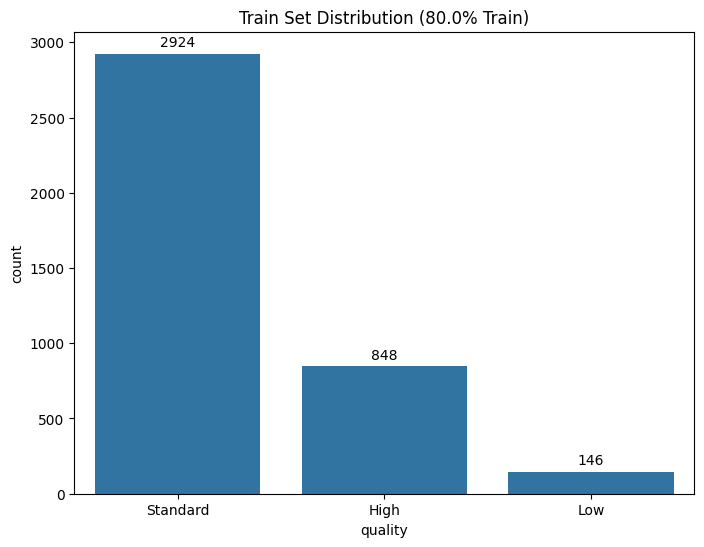

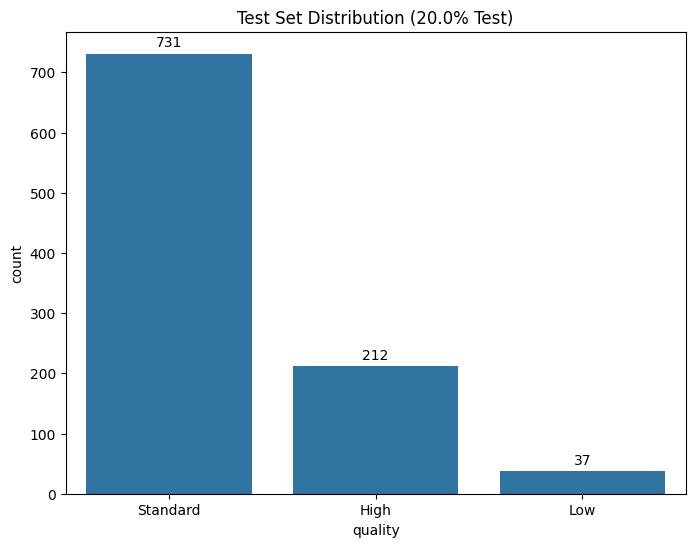

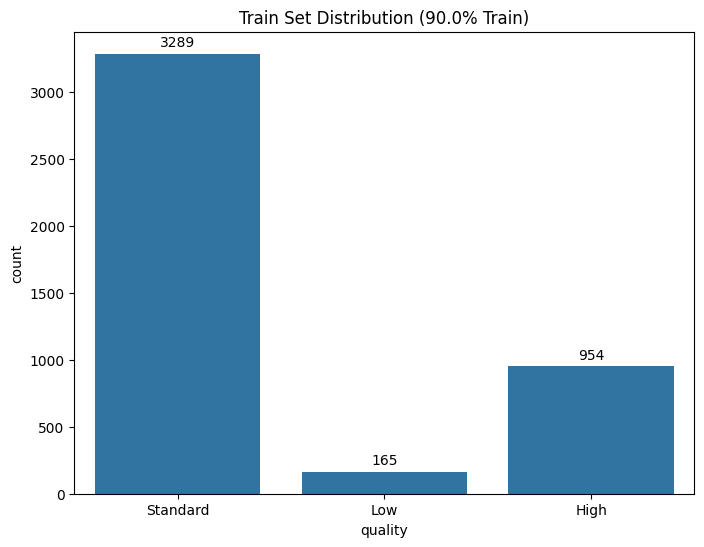

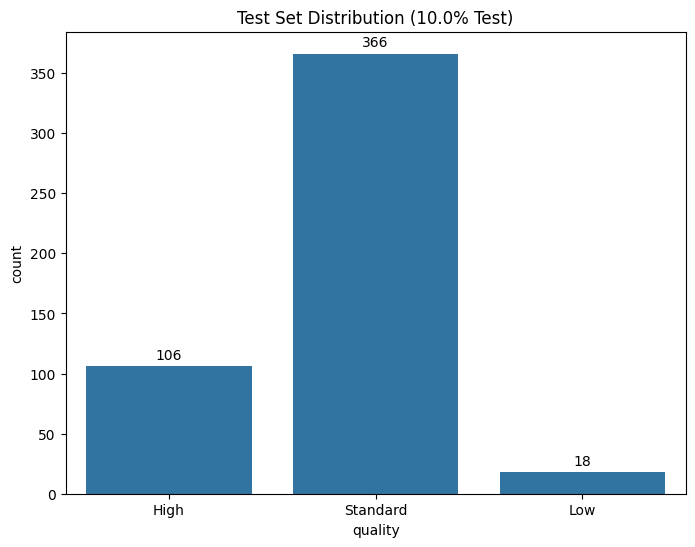

In [101]:
for i, (feature_train, feature_test, label_train, label_test) in enumerate(splits):

    # Train set distribution
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=label_train)
    plt.title(f"Train Set Distribution ({proportions[i][0] * 100}% Train)")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    plt.show()

    # Test set distribution
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=label_test)
    plt.title(f"Test Set Distribution ({proportions[i][1] * 100}% Test)")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    plt.show()

# 2.2 Building the decision tree classifiers

Decision Tree for Train 40.0% / Test 60.0%


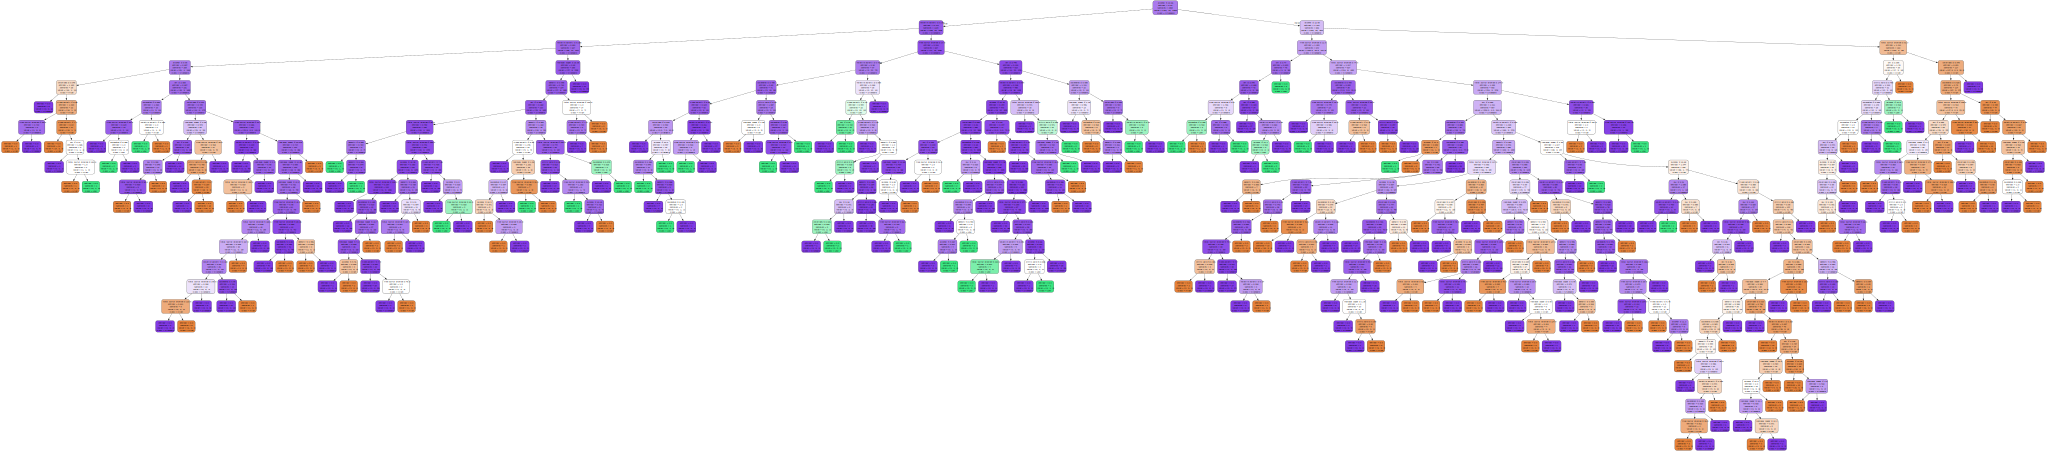

Decision Tree for Train 60.0% / Test 40.0%


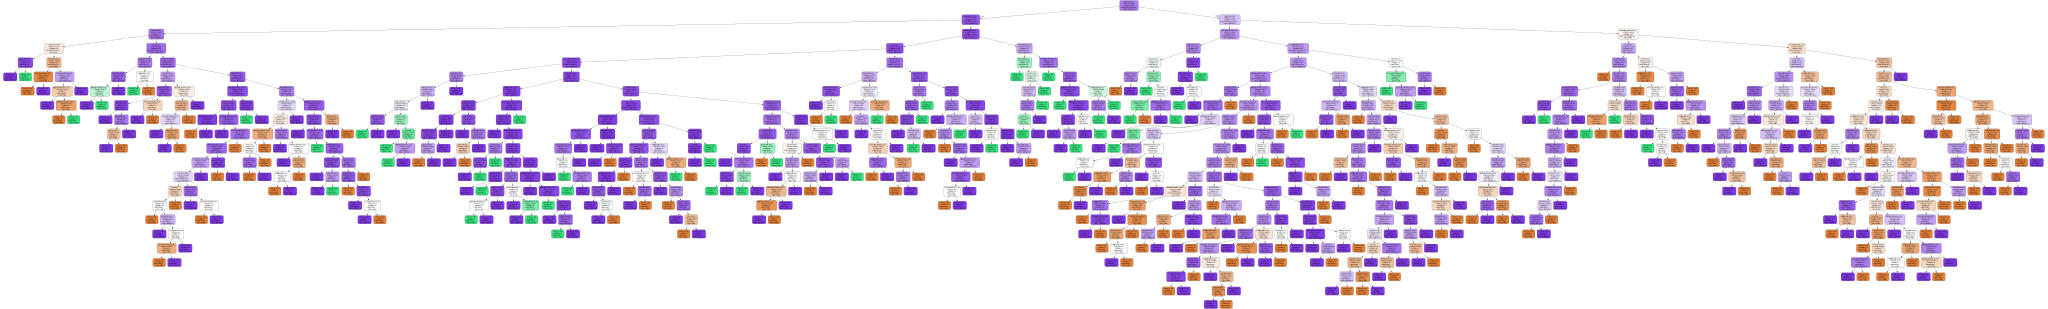

Decision Tree for Train 80.0% / Test 20.0%


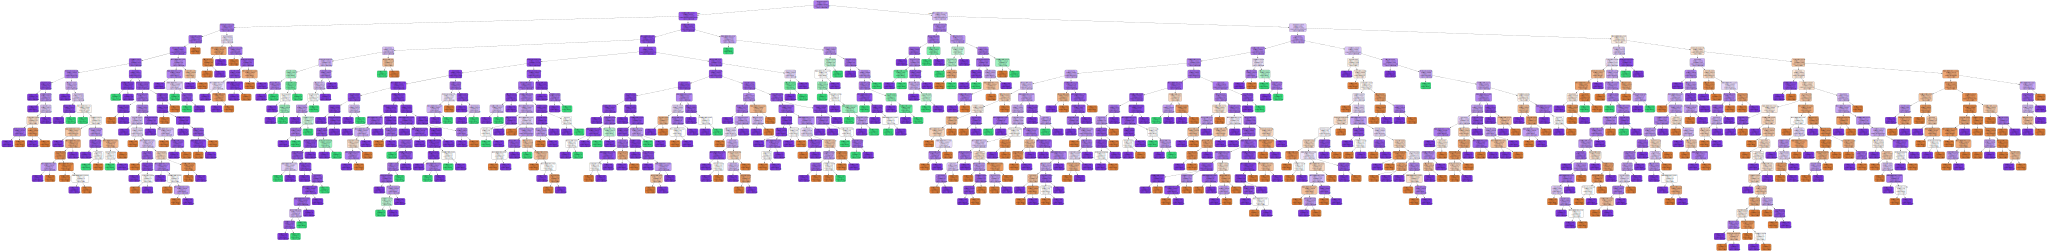

Decision Tree for Train 90.0% / Test 10.0%


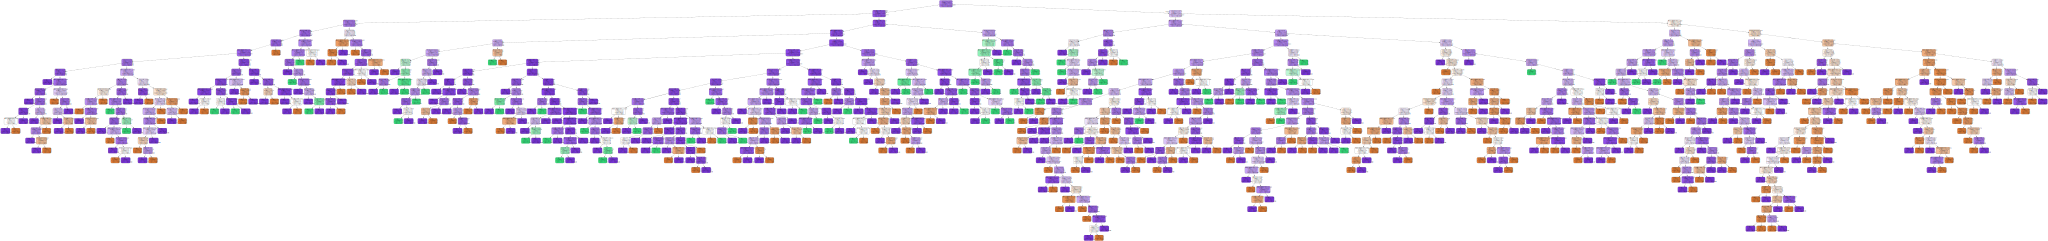

In [102]:
for i, (feature_train, feature_test, label_train, label_test) in enumerate(splits):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth_value, random_state=42)
    clf.fit(feature_train, label_train)
    
    # Export the decision tree in DOT format
    dot_data = export_graphviz(clf, out_file=None, 
                               feature_names=X.columns,  
                               class_names=clf.classes_,  
                               filled=True, 
                               rounded=True,  
                               special_characters=True)  
    
    # Create the decision tree graph
    graph = graphviz.Source(dot_data)
    
    # Show the decision tree 
    print(f"Decision Tree for Train {proportions[i][0] * 100}% / Test {proportions[i][1] * 100}%")
    display(graph)

# 2.3 Evaluating the decision tree classifiers


Classification Report for (60.0% Test):
              precision    recall  f1-score   support

        High       0.52      0.53      0.53       636
         Low       0.22      0.20      0.21       110
    Standard       0.83      0.83      0.83      2193

    accuracy                           0.74      2939
   macro avg       0.52      0.52      0.52      2939
weighted avg       0.74      0.74      0.74      2939



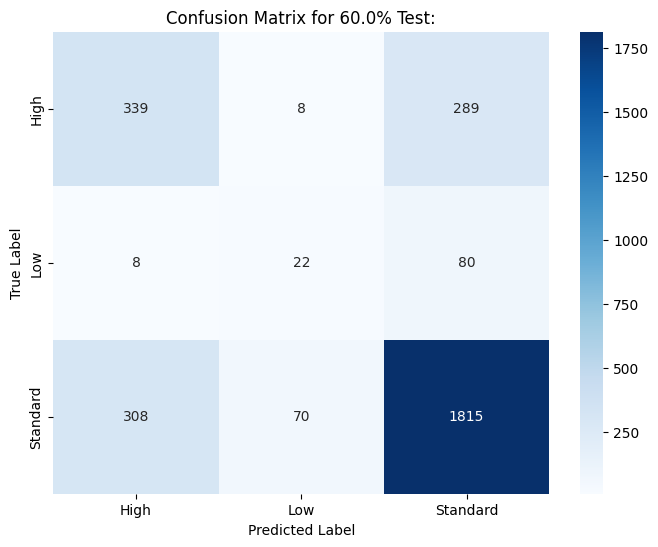


Classification Report for (40.0% Test):
              precision    recall  f1-score   support

        High       0.58      0.61      0.59       424
         Low       0.29      0.33      0.31        73
    Standard       0.86      0.84      0.85      1463

    accuracy                           0.77      1960
   macro avg       0.58      0.59      0.58      1960
weighted avg       0.78      0.77      0.78      1960



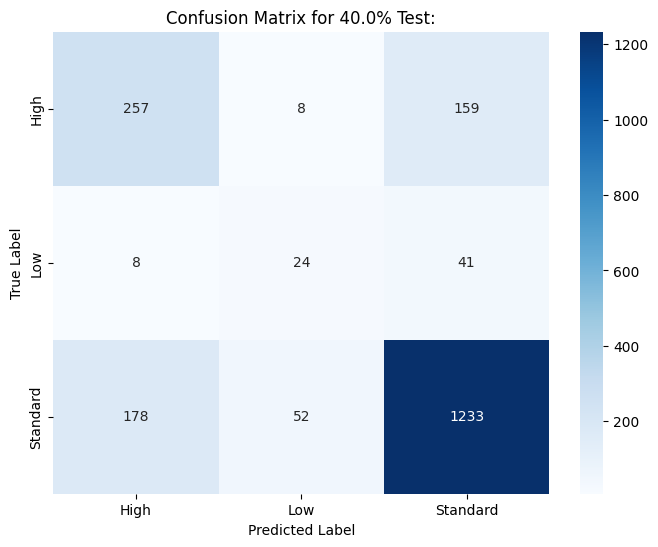


Classification Report for (20.0% Test):
              precision    recall  f1-score   support

        High       0.56      0.58      0.57       212
         Low       0.42      0.41      0.41        37
    Standard       0.86      0.85      0.85       731

    accuracy                           0.78       980
   macro avg       0.61      0.61      0.61       980
weighted avg       0.78      0.78      0.78       980



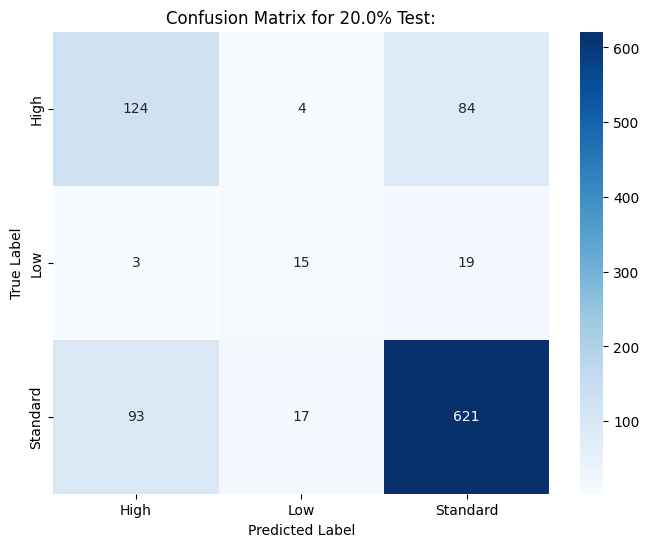


Classification Report for (10.0% Test):
              precision    recall  f1-score   support

        High       0.60      0.64      0.62       106
         Low       0.39      0.39      0.39        18
    Standard       0.87      0.85      0.86       366

    accuracy                           0.79       490
   macro avg       0.62      0.63      0.62       490
weighted avg       0.79      0.79      0.79       490



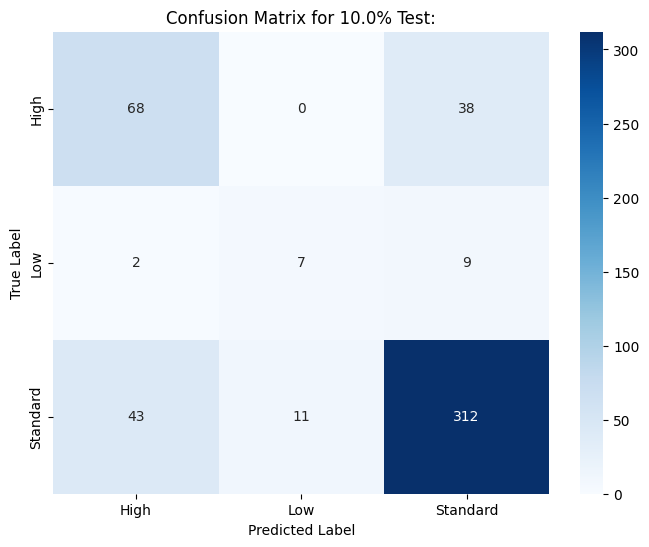

In [103]:
# Prediction and evaluation on test set
for i, (feature_train, feature_test, label_train, label_test) in enumerate(splits):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth_value, random_state=42)
    clf.fit(feature_train, label_train)
    
    # Predictions on the test set
    y_pred = clf.predict(feature_test)
    
    # Print classification report
    print(f"\nClassification Report for ({proportions[i][1] * 100}% Test):")
    print(classification_report(label_test, y_pred, zero_division=1))
    
    # Print confusion matrix
    cm = confusion_matrix(label_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title(f"Confusion Matrix for {proportions[i][1] * 100}% Test:")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show(block=False)

plt.show()

# 2.4 The depth and accuracy of a decision tree

In [112]:
# Split the data into training and test sets (80/20 split)
feature_train, feature_test, label_train, label_test = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y, random_state=42)

# Initialize lists to store results and visualize each tree
depth_values = [None, 2, 3, 4, 5, 6, 7]
accuracy_results = []

## Provide the decision trees, visualized using Graphviz

Decision Tree for max_depth=None:


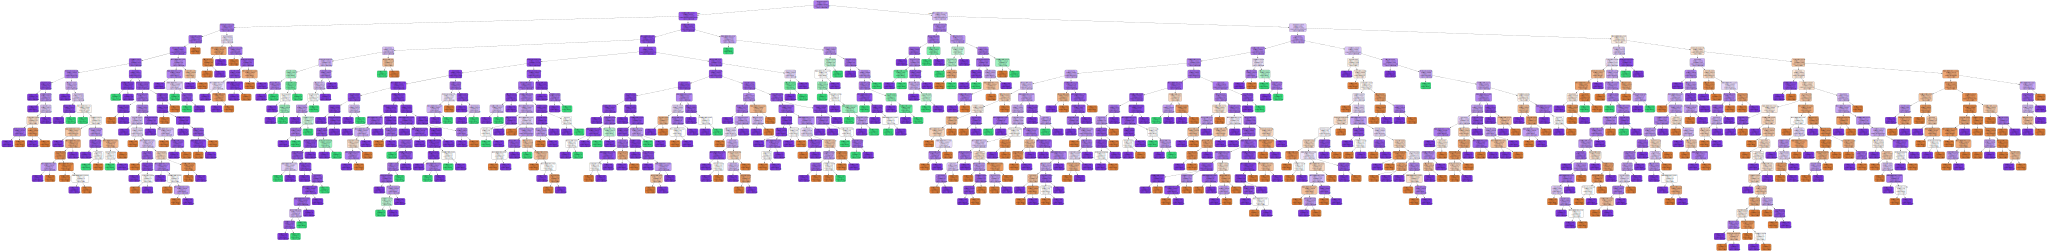

Decision Tree for max_depth=2:


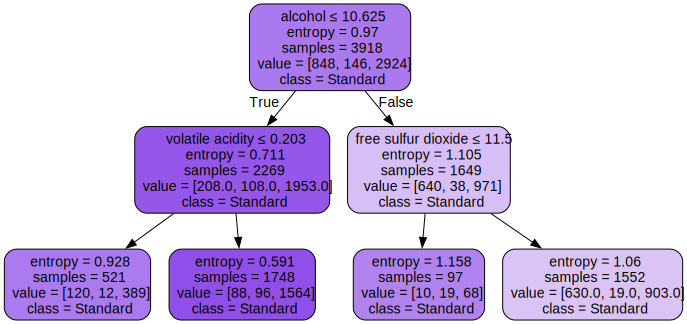

Decision Tree for max_depth=3:


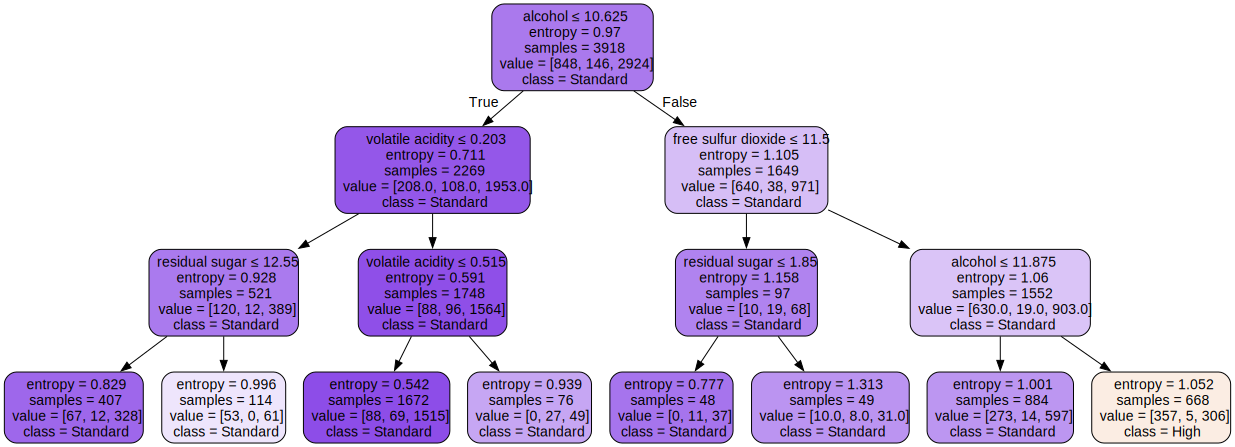

Decision Tree for max_depth=4:


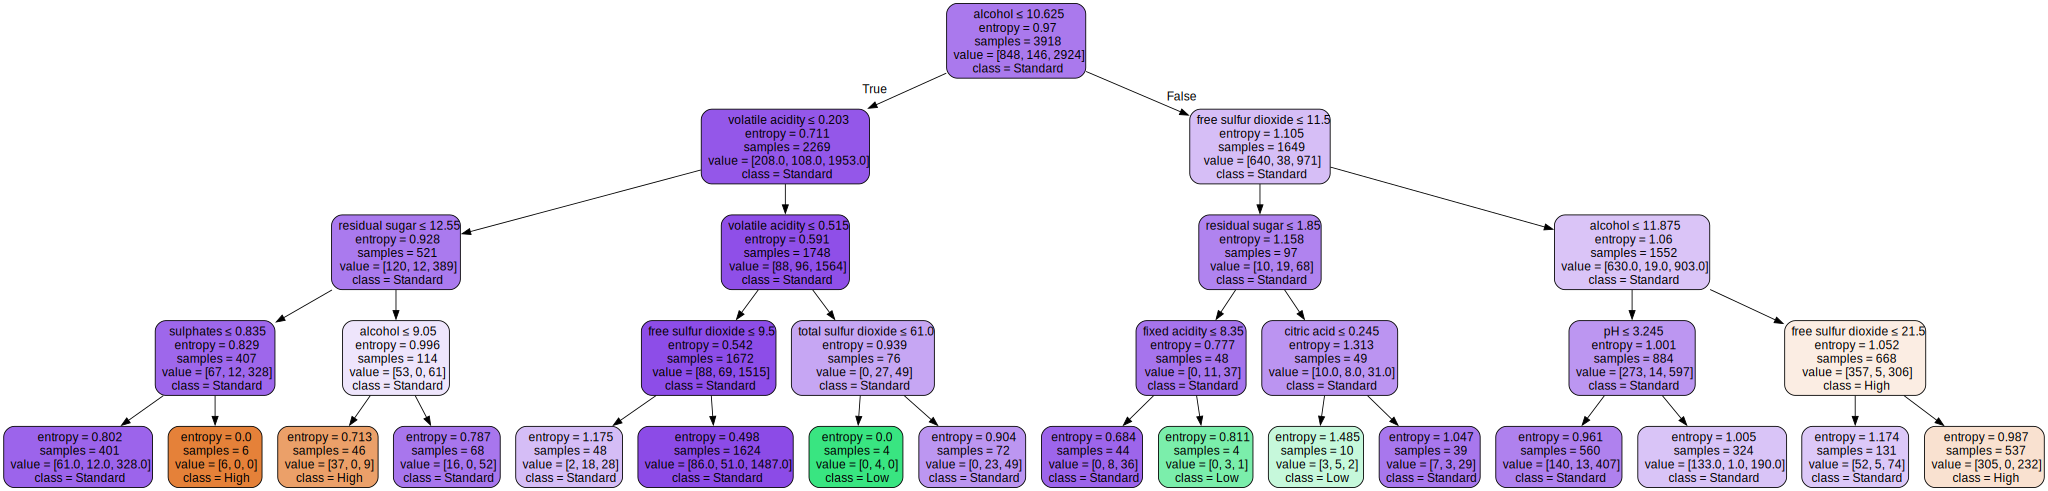

Decision Tree for max_depth=5:


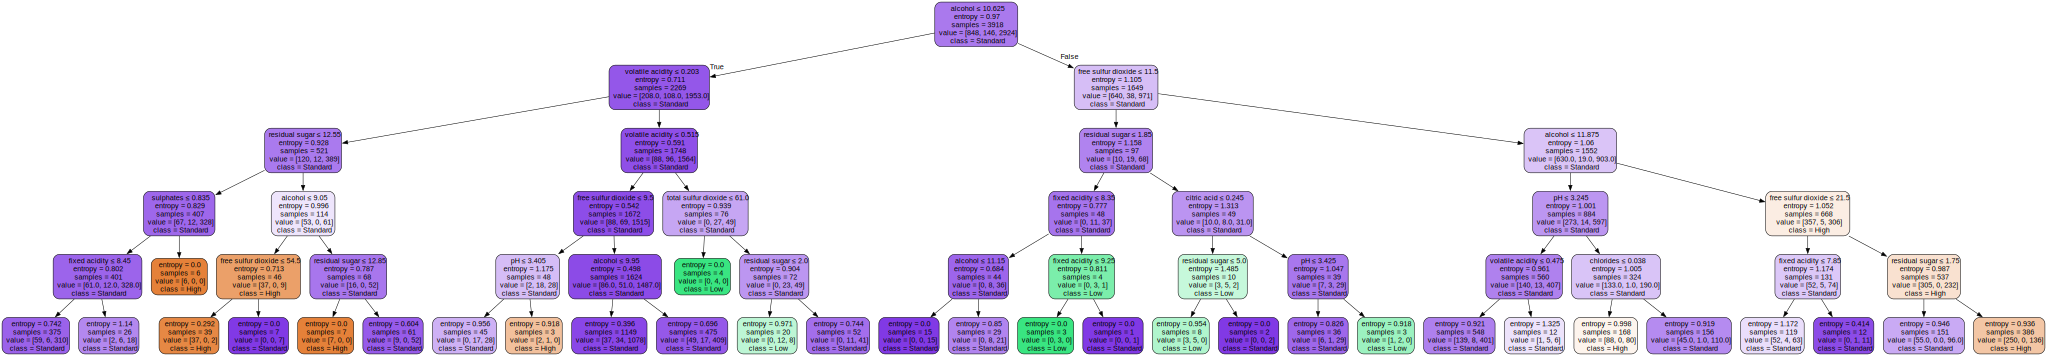

Decision Tree for max_depth=6:


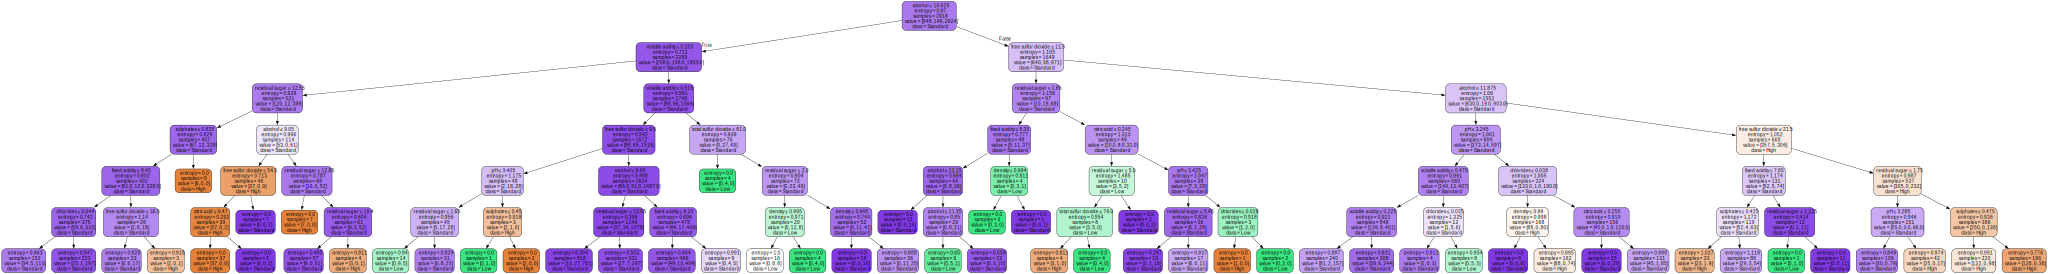

Decision Tree for max_depth=7:


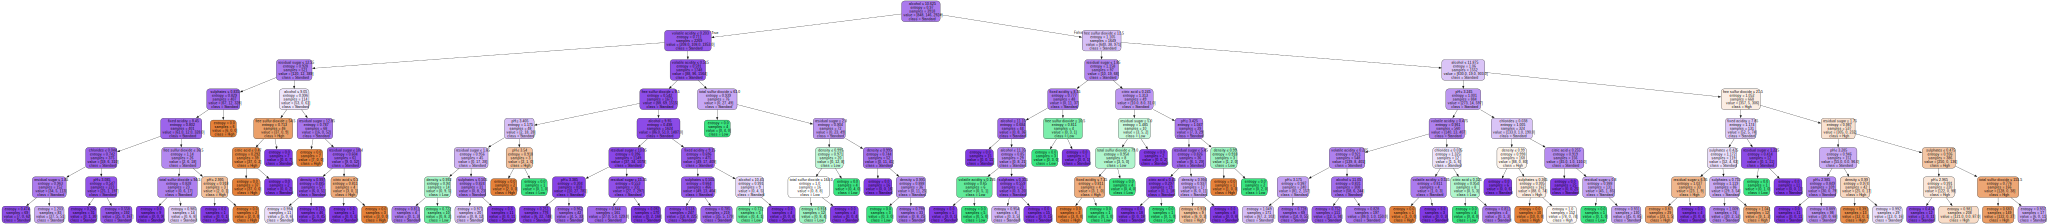

In [113]:
# Loop over the different max_depth values, train the model, evaluate accuracy, and visualize trees
for depth in depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(feature_train, label_train)
    
    # Predict on the test set
    y_pred = clf.predict(feature_test)
    
    # Calculate accuracy score
    acc = accuracy_score(label_test, y_pred)
    accuracy_results.append((depth, acc))
    
    # Visualize the decision tree
    dot_data = export_graphviz(clf, out_file=None, 
                               feature_names=X.columns,  
                               class_names=clf.classes_,  
                               filled=True, 
                               rounded=True,  
                               special_characters=True)  
    
    graph = graphviz.Source(dot_data)
    
    print(f"Decision Tree for max_depth={depth}:")
    # Display the tree in Jupyter without saving
    display(graph)

## Report the accuracy_score

In [105]:
print("Accuracy Report:")
accuracy_df = pd.DataFrame(accuracy_results, columns=['max_depth', 'Accuracy'])
accuracy_df = accuracy_df.set_index('max_depth').T  # Transpose the table
display(accuracy_df)

Accuracy Report:


max_depth      NaN       2.0       3.0       4.0       5.0       6.0       7.0
Accuracy   0.77551  0.745918  0.761224  0.772449  0.781633  0.786735  0.787755

## Chart depth affects accuracy

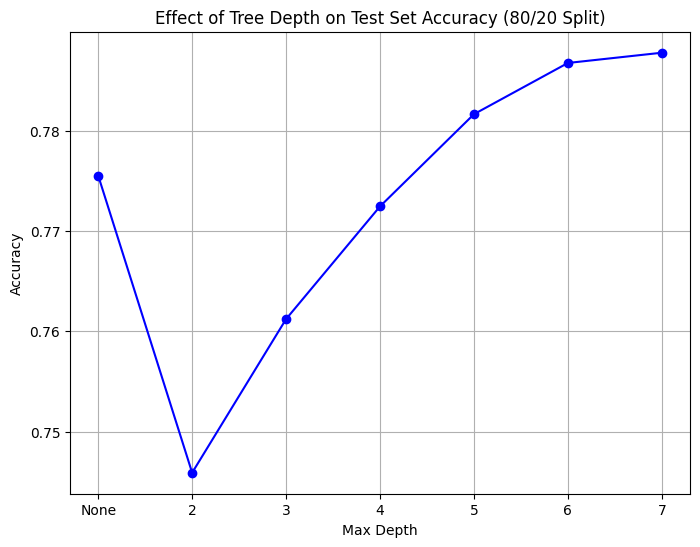

In [106]:
# Plot the accuracy scores for each depth value
depth_labels = ['None' if d is None else str(d) for d in depth_values]
accuracies = [acc for _, acc in accuracy_results]

plt.figure(figsize=(8, 6))
plt.plot(depth_labels, accuracies, marker='o', linestyle='-', color='b')
plt.title("Effect of Tree Depth on Test Set Accuracy (80/20 Split)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()